In [72]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Colorado

Note: marijuana legalized in 2012

### Colorado Sales

In [73]:
tax = pd.read_csv('./datasets/bdc/Marijuana_Sales_Tax_Revenue_in_Colorado.csv')
tax.describe()

,Month,Year,Med_Tax_Rev,Rec_Tax_Rev
count,1702.000000,1702.000000,1470.000000,937.000000
mean,6.621622,2016.272033,37445.813639,68106.806542
std,3.367228,1.355427,93289.169232,124510.511870
min,1.000000,2014.000000,-5267.000000,0.000000
25%,4.000000,2015.000000,1215.750000,11079.000000
50%,7.000000,2016.000000,6619.000000,25874.000000
75%,10.000000,2017.000000,23715.000000,69020.000000
max,12.000000,2018.000000,593786.000000,885739.000000


In [74]:
tax = tax[['Year', 'Med_Tax_Rev', 'Rec_Tax_Rev']]
tax.shape

(1702, 3)

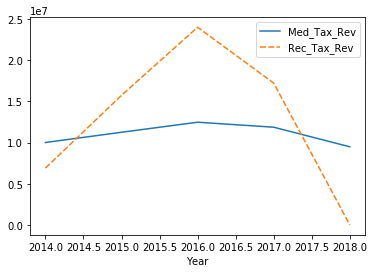

In [75]:
tax_yr = tax.groupby('Year').sum()
sns.lineplot(data=tax_yr)
plt.show()

### Opiod Overdose Deaths

https://data.world/health/opioid-overdose-deaths

In [76]:
deaths = pd.read_csv('./datasets/bdc/Multiple Cause of Death, 1999-2014 v1.1.csv')
deaths.head()

,State,Year,Deaths,Population,Crude Rate,Crude Rate Lower 95% Confidence Interval,Crude Rate Upper 95% Confidence Interval,Prescriptions Dispensed by US Retailers in that year (millions)
0,Alabama,1999,39,4430141,0.9,0.6,1.2,116
1,Alabama,2000,46,4447100,1,0.8,1.4,126
2,Alabama,2001,67,4467634,1.5,1.2,1.9,138
3,Alabama,2002,75,4480089,1.7,1.3,2.1,142
4,Alabama,2003,54,4503491,1.2,0.9,1.6,149


In [77]:
deaths.shape

(816, 8)

In [78]:
deaths.dtypes

State                                                              object
Year                                                                int64
Deaths                                                             object
Population                                                          int64
Crude Rate                                                         object
Crude Rate Lower 95% Confidence Interval                           object
Crude Rate Upper 95% Confidence Interval                           object
Prescriptions Dispensed by US Retailers in that year (millions)     int64
dtype: object

In [79]:
deaths['Deaths'].value_counts()

Suppressed    13
29             7
14             7
47             6
10             6
46             6
112            6
32             6
34             6
94             5
60             5
52             5
54             5
41             5
134            5
16             4
33             4
108            4
75             4
158            4
203            4
185            4
53             4
57             4
17             4
48             4
26             4
13             4
175            4
45             4
              ..
254            1
594            1
252            1
99             1
789            1
56             1
128            1
1139           1
353            1
97             1
471            1
725            1
636            1
557            1
282            1
11             1
202            1
332            1
118            1
1080           1
757            1
2159           1
530            1
193            1
934            1
647            1
1263           1
176           

In [80]:
deaths = deaths[deaths['Deaths'] != 'Suppressed']
deaths[deaths['Deaths'] == 'Suppressed'] 

,State,Year,Deaths,Population,Crude Rate,Crude Rate Lower 95% Confidence Interval,Crude Rate Upper 95% Confidence Interval,Prescriptions Dispensed by US Retailers in that year (millions)


In [81]:
deaths.Deaths = deaths.Deaths.astype(np.int64)

In [82]:
deaths.dtypes

State                                                              object
Year                                                                int64
Deaths                                                              int64
Population                                                          int64
Crude Rate                                                         object
Crude Rate Lower 95% Confidence Interval                           object
Crude Rate Upper 95% Confidence Interval                           object
Prescriptions Dispensed by US Retailers in that year (millions)     int64
dtype: object

In [83]:
deaths['Deaths per Population'] = deaths['Deaths'] / deaths['Population']

In [84]:
deaths_col = deaths[deaths['State'] == 'Colorado']
deaths_col

,State,Year,Deaths,Population,Crude Rate,Crude Rate Lower 95% Confidence Interval,Crude Rate Upper 95% Confidence Interval,Prescriptions Dispensed by US Retailers in that year (millions),Deaths per Population
80,Colorado,1999,169,4226018,4,3.4,4.6,116,0.000040
81,Colorado,2000,184,4301261,4.3,3.7,4.9,126,0.000043
82,Colorado,2001,204,4425687,4.6,4,5.2,138,0.000046
83,Colorado,2002,206,4490406,4.6,4,5.2,142,0.000046
84,Colorado,2003,229,4528732,5.1,4.4,5.7,149,0.000051
85,Colorado,2004,233,4575013,5.1,4.4,5.7,155,0.000051
86,Colorado,2005,310,4631888,6.7,5.9,7.4,163,0.000067
87,Colorado,2006,337,4720423,7.1,6.4,7.9,174,0.000071
88,Colorado,2007,368,4803868,7.7,6.9,8.4,184,0.000077
89,Colorado,2008,365,4889730,7.5,6.7,8.2,196,0.000075


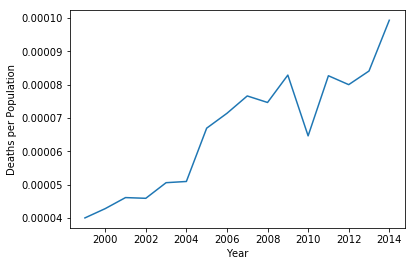

In [85]:
sns.lineplot(x='Year', y='Deaths per Population', data=deaths_col)
plt.show()

### Crime Rate

https://data.world/carlvlewis/u-s-metro-areas-violent-crime-rates-by-type-1970-2015

In [86]:
crime = pd.read_csv('./datasets/bdc/ucr_crime_1975_2015.csv')
crime.head()

,ORI,year,department_name,total_pop,homs_sum,rape_sum,rob_sum,agg_ass_sum,violent_crime,months_reported,violent_per_100k,homs_per_100k,rape_per_100k,rob_per_100k,agg_ass_per_100k,source,url
0,NM00101,1975,"Albuquerque, N.M.",286238.0,30.0,181.0,819.0,1353.0,2383.0,12.0,832.523984,10.480789,63.234092,286.125532,472.683571,NaN,NaN
1,TX22001,1975,"Arlington, Texas",112478.0,5.0,28.0,113.0,132.0,278.0,12.0,247.159445,4.445314,24.893757,100.464091,117.356283,NaN,NaN
2,GAAPD00,1975,Atlanta,490584.0,185.0,443.0,3887.0,3518.0,8033.0,12.0,1637.436198,37.710158,90.300540,792.320989,717.104512,NaN,NaN
3,CO00101,1975,"Aurora, Colo.",116656.0,7.0,44.0,171.0,389.0,611.0,12.0,523.762173,6.000549,37.717734,146.584831,333.459059,NaN,NaN
4,TX22701,1975,"Austin, Texas",300400.0,33.0,190.0,529.0,463.0,1215.0,12.0,404.460719,10.985353,63.249001,176.098535,154.127830,NaN,NaN


In [87]:
crime.shape

(2829, 17)

In [88]:
crime.describe()

,year,total_pop,homs_sum,rape_sum,rob_sum,agg_ass_sum,violent_crime,months_reported,violent_per_100k,homs_per_100k,rape_per_100k,rob_per_100k,agg_ass_per_100k
count,2829.000000,2.760000e+03,2795.000000,2754.000000,2754.000000,2753.000000,2.794000e+03,2692.000000,2794.000000,2795.000000,2754.000000,2754.000000,2753.000000
mean,1995.000000,7.956981e+05,398.385331,416.278867,4000.245098,4405.146023,2.963255e+04,11.868871,1093.049952,15.372760,59.305140,459.968134,566.595538
std,11.834251,1.012451e+06,2281.276402,479.811934,8653.902965,6977.293769,1.728630e+05,1.118194,676.884703,12.350651,31.971735,340.903545,369.437018
min,1975.000000,1.007630e+05,1.000000,15.000000,83.000000,15.000000,1.540000e+02,0.000000,16.494563,0.205464,1.640771,11.460508,1.606613
25%,1985.000000,3.779310e+05,32.000000,176.250000,1032.000000,1467.000000,3.014750e+03,12.000000,625.082639,6.955241,35.773523,210.245093,319.091928
50%,1995.000000,5.366145e+05,64.000000,291.000000,1940.000000,2597.000000,5.135500e+03,12.000000,949.676451,11.984468,55.900545,374.398220,487.484783
75%,2005.000000,8.168558e+05,131.000000,465.000000,3609.750000,4556.000000,9.058500e+03,12.000000,1409.508836,20.231759,77.795869,612.005983,728.238584
max,2015.000000,8.550861e+06,24703.000000,3899.000000,107475.000000,71030.000000,1.932274e+06,12.000000,4352.834209,94.735602,199.301908,2337.518708,2368.216602


In [89]:
deps = []

for dep in crime['department_name']:
    if 'colo' in dep.lower():
        deps.append(dep)
print(len(deps))
print(deps)

41
['Aurora, Colo.', 'Aurora, Colo.', 'Aurora, Colo.', 'Aurora, Colo.', 'Aurora, Colo.', 'Aurora, Colo.', 'Aurora, Colo.', 'Aurora, Colo.', 'Aurora, Colo.', 'Aurora, Colo.', 'Aurora, Colo.', 'Aurora, Colo.', 'Aurora, Colo.', 'Aurora, Colo.', 'Aurora, Colo.', 'Aurora, Colo.', 'Aurora, Colo.', 'Aurora, Colo.', 'Aurora, Colo.', 'Aurora, Colo.', 'Aurora, Colo.', 'Aurora, Colo.', 'Aurora, Colo.', 'Aurora, Colo.', 'Aurora, Colo.', 'Aurora, Colo.', 'Aurora, Colo.', 'Aurora, Colo.', 'Aurora, Colo.', 'Aurora, Colo.', 'Aurora, Colo.', 'Aurora, Colo.', 'Aurora, Colo.', 'Aurora, Colo.', 'Aurora, Colo.', 'Aurora, Colo.', 'Aurora, Colo.', 'Aurora, Colo.', 'Aurora, Colo.', 'Aurora, Colo.', 'Aurora, Colo.']


In [90]:
crime_aurora = crime[crime['department_name'] == 'Aurora, Colo.']
crime_aurora.shape

(41, 17)

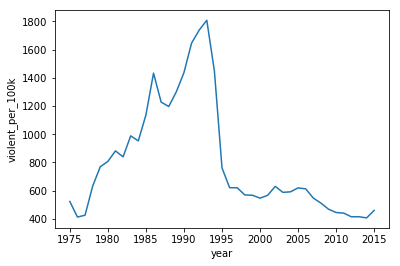

In [91]:
sns.lineplot(x='year', y='violent_per_100k', data=crime_aurora)
plt.show()

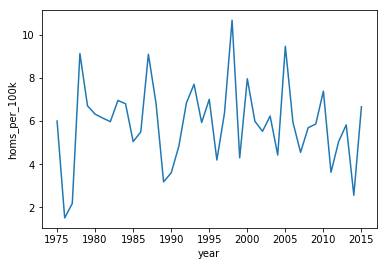

In [92]:
sns.lineplot(x='year', y='homs_per_100k', data=crime_aurora)
plt.show()

### Opioid Deaths

https://public.opendatasoft.com/explore/dataset/opioid-overdose-deaths-by-type-of-opioid/export/

In [93]:
deaths2 = pd.read_csv('datasets/bdc/opioid-overdose-deaths-by-type-of-opioid.csv', sep=';')
deaths2.head()

,Location,Year,Heroin,Heroin (missing reason),Methadone,Methadone (missing reason),"Natural and Semisynthetic Opioids (e.g. oxycodone, hydrocodone)","Natural and Semisynthetic Opioids (e.g. oxycodone, hydrocodone) (missing reason)","Synthetic Opioids, other than Methadone (e.g. fentanyl, tramadol)","Synthetic Opioids, other than Methadone (e.g. fentanyl, tramadol) (missing reason)",Footnotes
0,Alabama,2014,122.0,NaN,44.0,NaN,90.0,NaN,47.0,NaN,NaN
1,South Carolina,2013,32.0,NaN,50.0,NaN,144.0,NaN,50.0,NaN,NaN
2,Colorado,2011,79.0,NaN,61.0,NaN,198.0,NaN,78.0,NaN,NaN
3,Mississippi,2011,NaN,Not sufficient data. Data supressed to ensure ...,14.0,NaN,48.0,NaN,18.0,NaN,NaN
4,Utah,2011,73.0,NaN,75.0,NaN,280.0,NaN,56.0,NaN,NaN


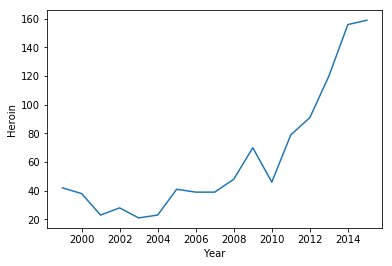

In [94]:
deaths2_col = deaths2[deaths2['Location'] == 'Colorado']
sns.lineplot(x='Year', y='Heroin', data=deaths2_col)
plt.show()

In [95]:
deaths2.columns

Index(['Location', 'Year', 'Heroin', 'Heroin (missing reason)', 'Methadone',
       'Methadone (missing reason)',
       'Natural and Semisynthetic Opioids (e.g. oxycodone, hydrocodone)',
       'Natural and Semisynthetic Opioids (e.g. oxycodone, hydrocodone) (missing reason)',
       'Synthetic Opioids, other than Methadone (e.g. fentanyl, tramadol)',
       'Synthetic Opioids, other than Methadone (e.g. fentanyl, tramadol) (missing reason)',
       'Footnotes'],
      dtype='object')

In [96]:
columns = ['Location', 'Year', 'Heroin', 'Methadone',
           'Natural and Semisynthetic Opioids (e.g. oxycodone, hydrocodone)',
           'Synthetic Opioids, other than Methadone (e.g. fentanyl, tramadol)'
          ]
deaths2 = deaths2[columns]
deaths2_col = deaths2_col[columns]

In [97]:
deaths2.shape

(867, 6)

In [98]:
columns = ['Location', 'Year', 'Heroin', 'Methadone',
           'Natural and Semisynthetic Opioids',
           'Synthetic Opioids']

deaths2.columns = columns
deaths2_col.columns = columns

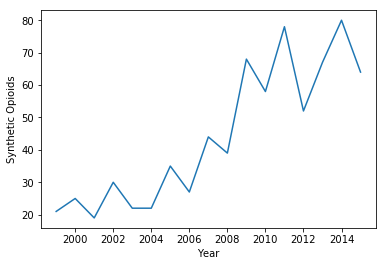

In [99]:
sns.lineplot(x='Year', y='Synthetic Opioids', data=deaths2_col)
plt.show()

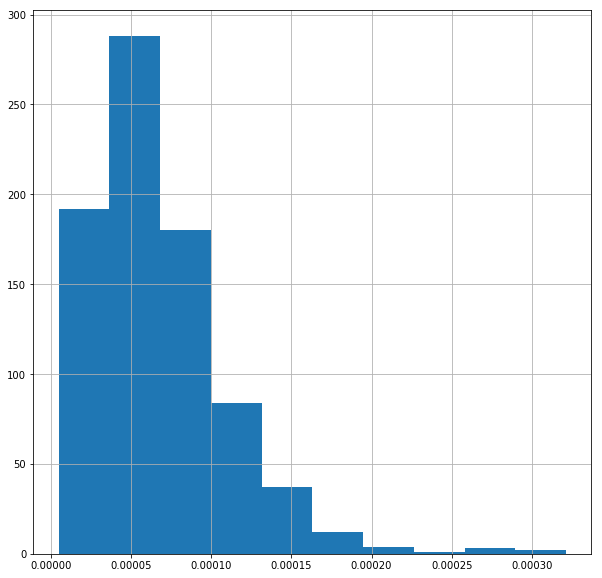

In [100]:
deaths['Deaths per Population'].hist(figsize=(10, 10))
plt.show()

In [101]:
deaths[['Year', 'Deaths per Population']][deaths['State'] == 'Colorado']

,Year,Deaths per Population
80,1999,0.000040
81,2000,0.000043
82,2001,0.000046
83,2002,0.000046
84,2003,0.000051
85,2004,0.000051
86,2005,0.000067
87,2006,0.000071
88,2007,0.000077
89,2008,0.000075


In [102]:
deaths['State'].value_counts()

North Carolina          16
Maryland                16
Missouri                16
New Jersey              16
Pennsylvania            16
Indiana                 16
New Mexico              16
Massachusetts           16
Vermont                 16
Louisiana               16
Texas                   16
Connecticut             16
Nevada                  16
Kansas                  16
Montana                 16
Arizona                 16
Arkansas                16
South Carolina          16
Colorado                16
Washington              16
Idaho                   16
Michigan                16
Minnesota               16
California              16
Tennessee               16
Ohio                    16
Oklahoma                16
Mississippi             16
District of Columbia    16
Hawaii                  16
Georgia                 16
Virginia                16
Rhode Island            16
Alabama                 16
New York                16
Kentucky                16
Illinois                16
M

In [103]:
deaths2['Year'].value_counts()

2015    51
2006    51
2000    51
2001    51
2002    51
2003    51
2004    51
2005    51
2007    51
2014    51
2008    51
2009    51
2010    51
2011    51
2012    51
2013    51
1999    51
Name: Year, dtype: int64

In [104]:
print(deaths2.columns)
print(deaths.columns)

Index(['Location', 'Year', 'Heroin', 'Methadone',
       'Natural and Semisynthetic Opioids', 'Synthetic Opioids'],
      dtype='object')
Index(['State', 'Year', 'Deaths', 'Population', 'Crude Rate',
       'Crude Rate Lower 95% Confidence Interval',
       'Crude Rate Upper 95% Confidence Interval',
       'Prescriptions Dispensed by US Retailers in that year (millions)',
       'Deaths per Population'],
      dtype='object')


In [105]:
columns = ['State', 'Year', 'Deaths', 'Population', 'Deaths per Population']
deaths = deaths[columns]

In [106]:
deaths2['Heroin'][deaths2['Location'] == 'Mississippi']

3       NaN
32     23.0
120    38.0
240     NaN
263     NaN
272     NaN
279     NaN
301     NaN
471    10.0
483     NaN
503     NaN
522     NaN
545     NaN
615     NaN
717     NaN
757     NaN
792     NaN
Name: Heroin, dtype: float64

In [107]:
deaths2 = deaths2.dropna()
deaths = deaths.dropna()
print(deaths.shape)
print(deaths2.shape)

(803, 5)
(499, 6)


In [108]:
df_death = pd.merge(deaths, deaths2, how='right', left_on=['State', 'Year'], right_on=['Location', 'Year'])
print(df_death.shape)
df_death.head()

(499, 10)


,State,Year,Deaths,Population,Deaths per Population,Location,Heroin,Methadone,Natural and Semisynthetic Opioids,Synthetic Opioids
0,Alabama,2009,210.0,4757938.0,0.000044,Alabama,12.0,88.0,92.0,31.0
1,Alabama,2011,180.0,4802740.0,0.000037,Alabama,14.0,63.0,92.0,19.0
2,Alabama,2012,175.0,4822023.0,0.000036,Alabama,35.0,55.0,62.0,16.0
3,Alabama,2013,175.0,4833722.0,0.000036,Alabama,40.0,41.0,65.0,30.0
4,Alabama,2014,282.0,4849377.0,0.000058,Alabama,122.0,44.0,90.0,47.0


In [109]:
df_death = df_death.dropna()
df_death = df_death.drop('Location', axis=1)
df_death.head()

,State,Year,Deaths,Population,Deaths per Population,Heroin,Methadone,Natural and Semisynthetic Opioids,Synthetic Opioids
0,Alabama,2009,210.0,4757938.0,0.000044,12.0,88.0,92.0,31.0
1,Alabama,2011,180.0,4802740.0,0.000037,14.0,63.0,92.0,19.0
2,Alabama,2012,175.0,4822023.0,0.000036,35.0,55.0,62.0,16.0
3,Alabama,2013,175.0,4833722.0,0.000036,40.0,41.0,65.0,30.0
4,Alabama,2014,282.0,4849377.0,0.000058,122.0,44.0,90.0,47.0


In [110]:
columns = ['Heroin', 'Methadone', 'Natural and Semisynthetic Opioids', 'Synthetic Opioids']

for column in columns:
    df_death[column + ' per Population'] = df_death[column] / df_death['Population']
df_death.head()

,State,Year,Deaths,Population,Deaths per Population,Heroin,Methadone,Natural and Semisynthetic Opioids,Synthetic Opioids,Heroin per Population,Methadone per Population,Natural and Semisynthetic Opioids per Population,Synthetic Opioids per Population
0,Alabama,2009,210.0,4757938.0,0.000044,12.0,88.0,92.0,31.0,0.000003,0.000018,0.000019,0.000007
1,Alabama,2011,180.0,4802740.0,0.000037,14.0,63.0,92.0,19.0,0.000003,0.000013,0.000019,0.000004
2,Alabama,2012,175.0,4822023.0,0.000036,35.0,55.0,62.0,16.0,0.000007,0.000011,0.000013,0.000003
3,Alabama,2013,175.0,4833722.0,0.000036,40.0,41.0,65.0,30.0,0.000008,0.000008,0.000013,0.000006
4,Alabama,2014,282.0,4849377.0,0.000058,122.0,44.0,90.0,47.0,0.000025,0.000009,0.000019,0.000010


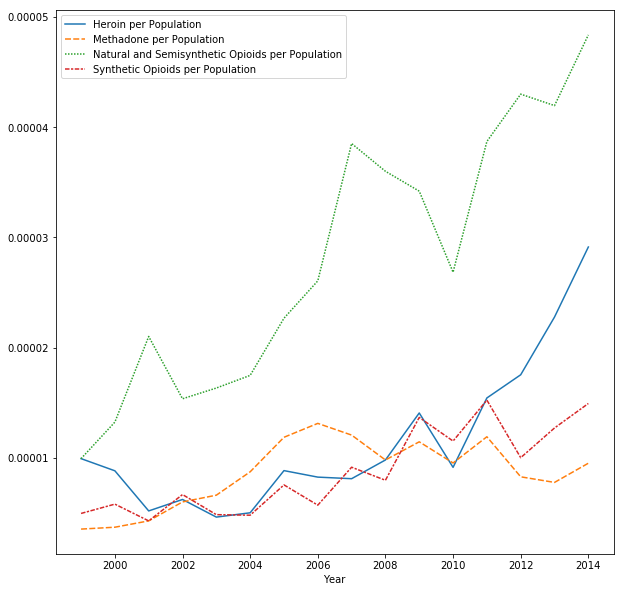

In [111]:
per_pop = ['Heroin per Population', 'Methadone per Population',
           'Natural and Semisynthetic Opioids per Population', 'Synthetic Opioids per Population']

plt.figure(figsize=(10, 10))
sns.lineplot(data=df_death[per_pop + ['Year']][df_death['State'] == 'Colorado'].groupby('Year').sum())
plt.show()

In [112]:
df_death['State'].value_counts()

Pennsylvania      16
Texas             16
California        16
Nevada            16
Michigan          16
Florida           16
Washington        16
Colorado          16
Virginia          16
Wisconsin         16
Missouri          16
Illinois          16
Arizona           16
New Mexico        16
New York          16
North Carolina    16
Massachusetts     15
New Jersey        15
Ohio              15
Utah              14
Oregon            14
Maryland          12
Connecticut       11
West Virginia      9
Indiana            9
Tennessee          8
Louisiana          8
Georgia            8
South Carolina     8
Kentucky           7
New Hampshire      7
Oklahoma           6
Minnesota          6
Iowa               5
Delaware           5
Alabama            5
Kansas             4
Maine              3
Rhode Island       3
Idaho              1
Alaska             1
Vermont            1
Mississippi        1
Name: State, dtype: int64

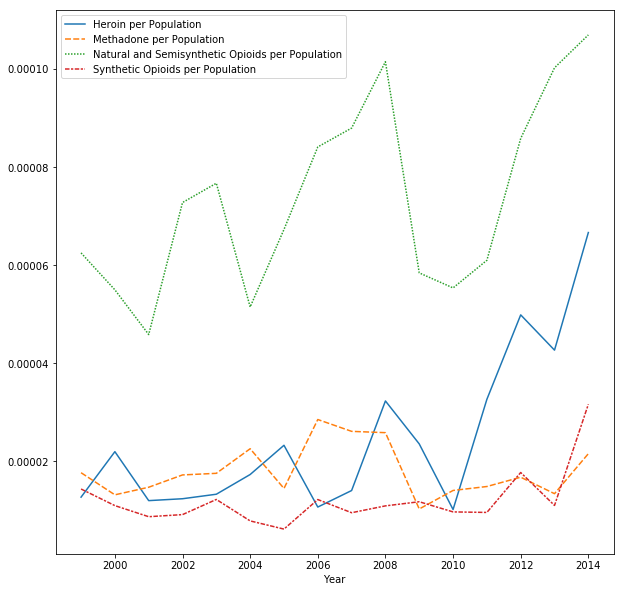

In [113]:
plt.figure(figsize=(10, 10))
sns.lineplot(data=df_death[per_pop + ['Year']][df_death['State'] == 'New Mexico'].groupby('Year').sum())
plt.show()

In [114]:
neigh_states = ['Kansas', 'Nebraska', 'Wyoming', 'Utah', 'Arizona', 'New Mexico']

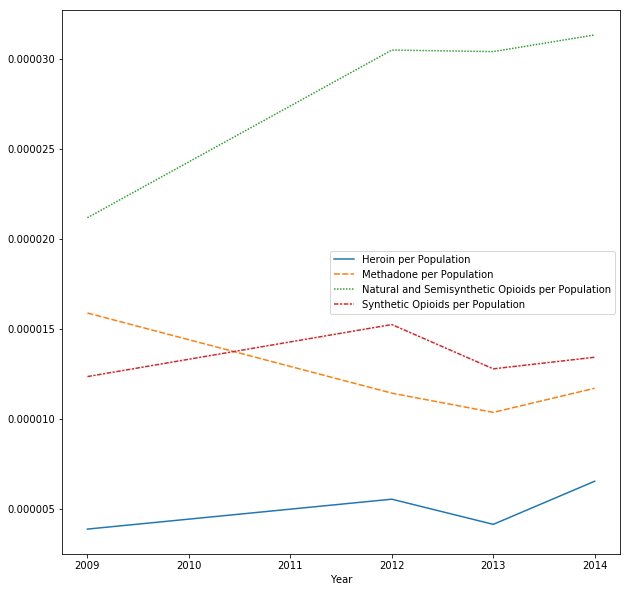

In [115]:
plt.figure(figsize=(10, 10))
sns.lineplot(data=df_death[per_pop + ['Year']][df_death['State'] == 'Kansas'].groupby('Year').sum())
plt.show()

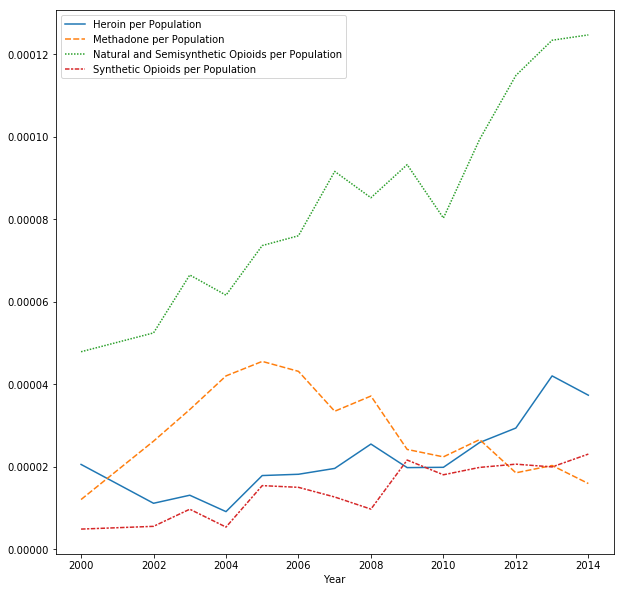

In [116]:
plt.figure(figsize=(10, 10))
sns.lineplot(data=df_death[per_pop + ['Year']][df_death['State'] == 'Utah'].groupby('Year').sum())
plt.show()

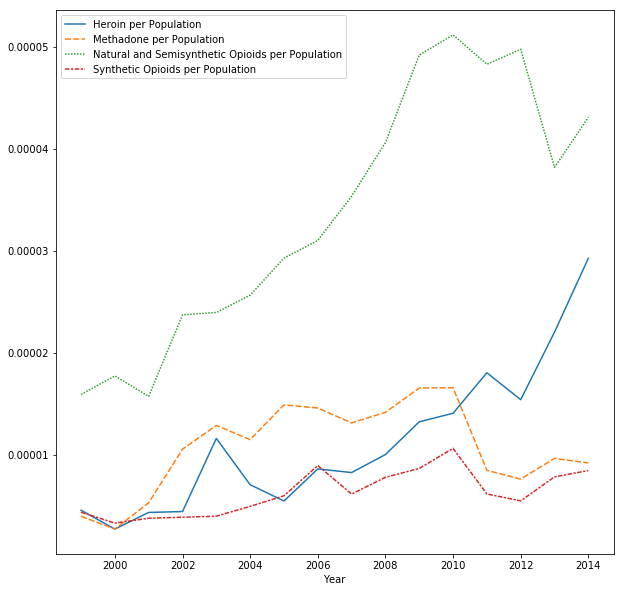

In [117]:
plt.figure(figsize=(10, 10))
sns.lineplot(data=df_death[per_pop + ['Year']][df_death['State'] == 'Arizona'].groupby('Year').sum())
plt.show()

In [118]:
df_death_2014 = df_death[df_death['Year'] == 2014]
df_death_2014 = df_death_2014.drop('Year', axis=1)
df_death_2014.head()

,State,Deaths,Population,Deaths per Population,Heroin,Methadone,Natural and Semisynthetic Opioids,Synthetic Opioids,Heroin per Population,Methadone per Population,Natural and Semisynthetic Opioids per Population,Synthetic Opioids per Population
4,Alabama,282.0,4849377.0,0.000058,122.0,44.0,90.0,47.0,0.000025,0.000009,0.000019,0.000010
5,Alaska,79.0,736732.0,0.000107,25.0,12.0,40.0,14.0,0.000034,0.000016,0.000054,0.000019
21,Arizona,616.0,6731484.0,0.000092,197.0,62.0,290.0,57.0,0.000029,0.000009,0.000043,0.000008
37,California,2159.0,38802500.0,0.000056,561.0,337.0,1047.0,194.0,0.000014,0.000009,0.000027,0.000005
53,Colorado,532.0,5355866.0,0.000099,156.0,51.0,259.0,80.0,0.000029,0.000010,0.000048,0.000015


In [119]:
df_death_2014['Deaths per Population'].max()

0.0003161605036085533

In [120]:
df_death_2014['Deaths per Population'].min()

4.5220235903472494e-05

In [121]:
df_death_2014['Deaths per Population'].dtype

dtype('float64')

In [122]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}

In [123]:
'''
import plotly.plotly as py
import plotly.graph_objs as go

df = df_death_2009

df['code'] = ''

for state in df['State']:
    df['code'][df['State'] == state] = us_state_abbrev[state]

for col in df.columns:
    df[col] = df[col].astype(str)

df['text'] = df['State']

data = [go.Choropleth(
    locations=df['code'],
    z=df['Deaths'],
    locationmode='USA-states',
    marker=go.choropleth.Marker(
        line=go.choropleth.marker.Line(color='rgb(255, 255, 255)',
                                       width=2)
    ),
    colorbar=go.choropleth.ColorBar(title='Deaths')
)]

layout = go.Layout(
    title=go.layout.Title(text='2009 Overdose Deaths by State'),
    geo=go.layout.Geo(scope='usa',
                      projection=go.layout.geo.Projection(type='albers usa'),
                      showlakes=True,
                      lakecolor='rgb(255, 255, 255)'))

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='deaths-2009')
'''

"\nimport plotly.plotly as py\nimport plotly.graph_objs as go\n\ndf = df_death_2009\n\ndf['code'] = ''\n\nfor state in df['State']:\n    df['code'][df['State'] == state] = us_state_abbrev[state]\n\nfor col in df.columns:\n    df[col] = df[col].astype(str)\n\ndf['text'] = df['State']\n\ndata = [go.Choropleth(\n    locations=df['code'],\n    z=df['Deaths'],\n    locationmode='USA-states',\n    marker=go.choropleth.Marker(\n        line=go.choropleth.marker.Line(color='rgb(255, 255, 255)',\n                                       width=2)\n    ),\n    colorbar=go.choropleth.ColorBar(title='Deaths')\n)]\n\nlayout = go.Layout(\n    title=go.layout.Title(text='2009 Overdose Deaths by State'),\n    geo=go.layout.Geo(scope='usa',\n                      projection=go.layout.geo.Projection(type='albers usa'),\n                      showlakes=True,\n                      lakecolor='rgb(255, 255, 255)'))\n\nfig = go.Figure(data=data, layout=layout)\npy.iplot(fig, filename='deaths-2009')\n"

In [124]:
df_death_2009 = df_death[df_death['Year'] == 2009]
df_death_2009 = df_death_2009.drop('Year', axis=1)
df_death_2009.head()

,State,Deaths,Population,Deaths per Population,Heroin,Methadone,Natural and Semisynthetic Opioids,Synthetic Opioids,Heroin per Population,Methadone per Population,Natural and Semisynthetic Opioids per Population,Synthetic Opioids per Population
0,Alabama,210.0,4757938.0,0.000044,12.0,88.0,92.0,31.0,0.000003,0.000018,0.000019,0.000007
16,Arizona,625.0,6343154.0,0.000099,84.0,105.0,312.0,55.0,0.000013,0.000017,0.000049,0.000009
32,California,2128.0,36961229.0,0.000058,352.0,426.0,1147.0,201.0,0.000010,0.000012,0.000031,0.000005
48,Colorado,412.0,4972195.0,0.000083,70.0,57.0,170.0,68.0,0.000014,0.000011,0.000034,0.000014
59,Connecticut,220.0,3561807.0,0.000062,99.0,42.0,31.0,20.0,0.000028,0.000012,0.000009,0.000006


In [125]:
corr_matrix = df_death.corr()

In [126]:
corr_matrix['Deaths per Population'].sort_values(ascending=False)

Deaths per Population                               1.000000
Natural and Semisynthetic Opioids per Population    0.893027
Synthetic Opioids per Population                    0.743982
Methadone per Population                            0.632086
Heroin per Population                               0.580676
Year                                                0.451349
Synthetic Opioids                                   0.159500
Natural and Semisynthetic Opioids                   0.110890
Heroin                                              0.052774
Deaths                                              0.032844
Methadone                                          -0.026247
Population                                         -0.402543
Name: Deaths per Population, dtype: float64

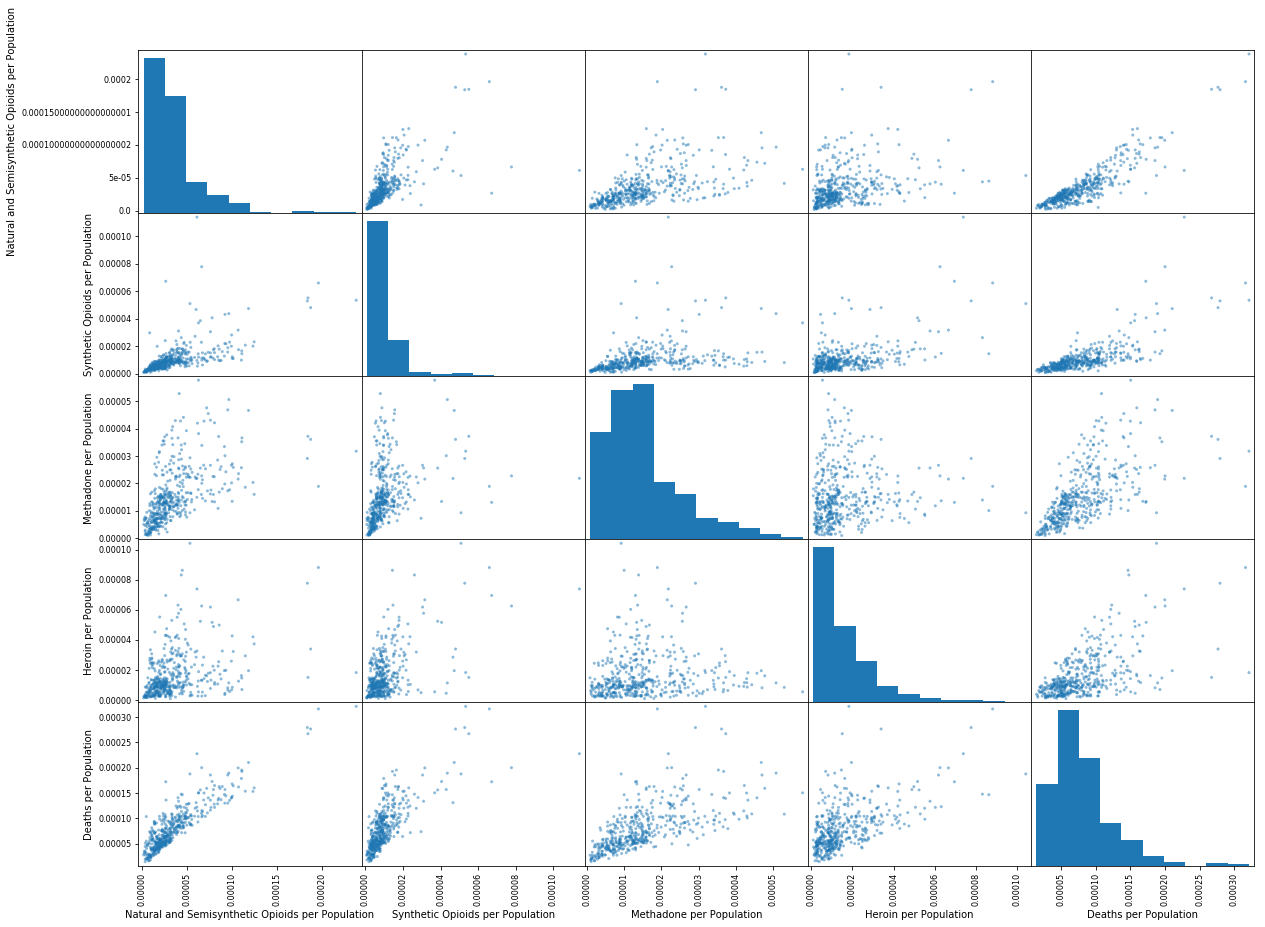

In [129]:
from pandas.plotting import scatter_matrix

attributes = ['Natural and Semisynthetic Opioids per Population', 'Synthetic Opioids per Population',
              'Methadone per Population', 'Heroin per Population', 'Deaths per Population']

scatter_matrix(df_death[attributes], figsize=(20, 15))
plt.show()

In [136]:
import statsmodels.api as sm

df_death_state = df_death[['Year', 'Natural and Semisynthetic Opioids per Population']][df_death['State'] == 'Colorado']

y = df_death_state['Natural and Semisynthetic Opioids per Population']
x1 = df_death_state['Year']

x = sm.add_constant(x1)

results = sm.OLS(y, x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                           OLS Regression Results                                           
============================================================================================================
Dep. Variable:     Natural and Semisynthetic Opioids per Population   R-squared:                       0.870
Model:                                                          OLS   Adj. R-squared:                  0.860
Method:                                               Least Squares   F-statistic:                     93.49
Date:                                              Mon, 20 May 2019   Prob (F-statistic):           1.42e-07
Time:                                                      09:26:48   Log-Likelihood:                 175.29
No. Observations:                                                16   AIC:                            -346.6
Df Residuals:                                                    14   BIC:                            -345.0
Df Model:                                                         1                                         
Covariance Type:                                          nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0047      0.000     -9.612      0.000      -0.006      -0.004
Year        2.368e-06   2.45e-07      9.669      0.000    1.84e-06    2.89e-06
==============================================================================
Omnibus:                        1.399   Durbin-Watson:                   1.630
Prob(Omnibus):                  0.497   Jarque-Bera (JB):                0.177
Skew:                           0.051   Prob(JB):                        0.915
Kurtosis:                       3.505   Cond. No.                     8.73e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.73e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [155]:
def calculate_slopes():
    columns = ['State',
               'Deaths per Population',
               'Natural and Semisynthetic Opioids per Population',
               'Synthetic Opioids per Population']
    data = []
    
    for state in df_death['State'].unique():
        contents = [state]
        df_death_state = df_death[['Year'] + columns][df_death['State'] == state]
        for column in columns[1:]:    
            y = df_death_state[column]
            x1 = df_death_state['Year']

            x = sm.add_constant(x1)

            results = sm.OLS(y, x).fit()
            contents.append(results.params['Year'])
        
        data.append(contents)
    
    return pd.DataFrame(columns=columns, data=data)

In [156]:
df_growth = calculate_slopes()
df_growth

,State,Deaths per Population,Natural and Semisynthetic Opioids per Population,Synthetic Opioids per Population
0,Alabama,1.694005e-06,-6.707791e-07,5.422681e-07
1,Alaska,5.324246e-08,2.695821e-08,9.435372e-09
2,Arizona,3.213424e-06,2.374460e-06,3.341479e-07
3,California,1.492489e-06,6.312769e-07,1.989103e-07
4,Colorado,3.555329e-06,2.368383e-06,6.987451e-07
5,Connecticut,6.279389e-06,2.814096e-06,1.486392e-06
6,Delaware,6.284313e-07,-5.619924e-06,4.024239e-06
7,Florida,2.766930e-06,2.340372e-06,3.708002e-07
8,Georgia,3.076654e-06,2.761791e-06,8.655414e-07
9,Idaho,2.430274e-08,1.275894e-08,3.949195e-09


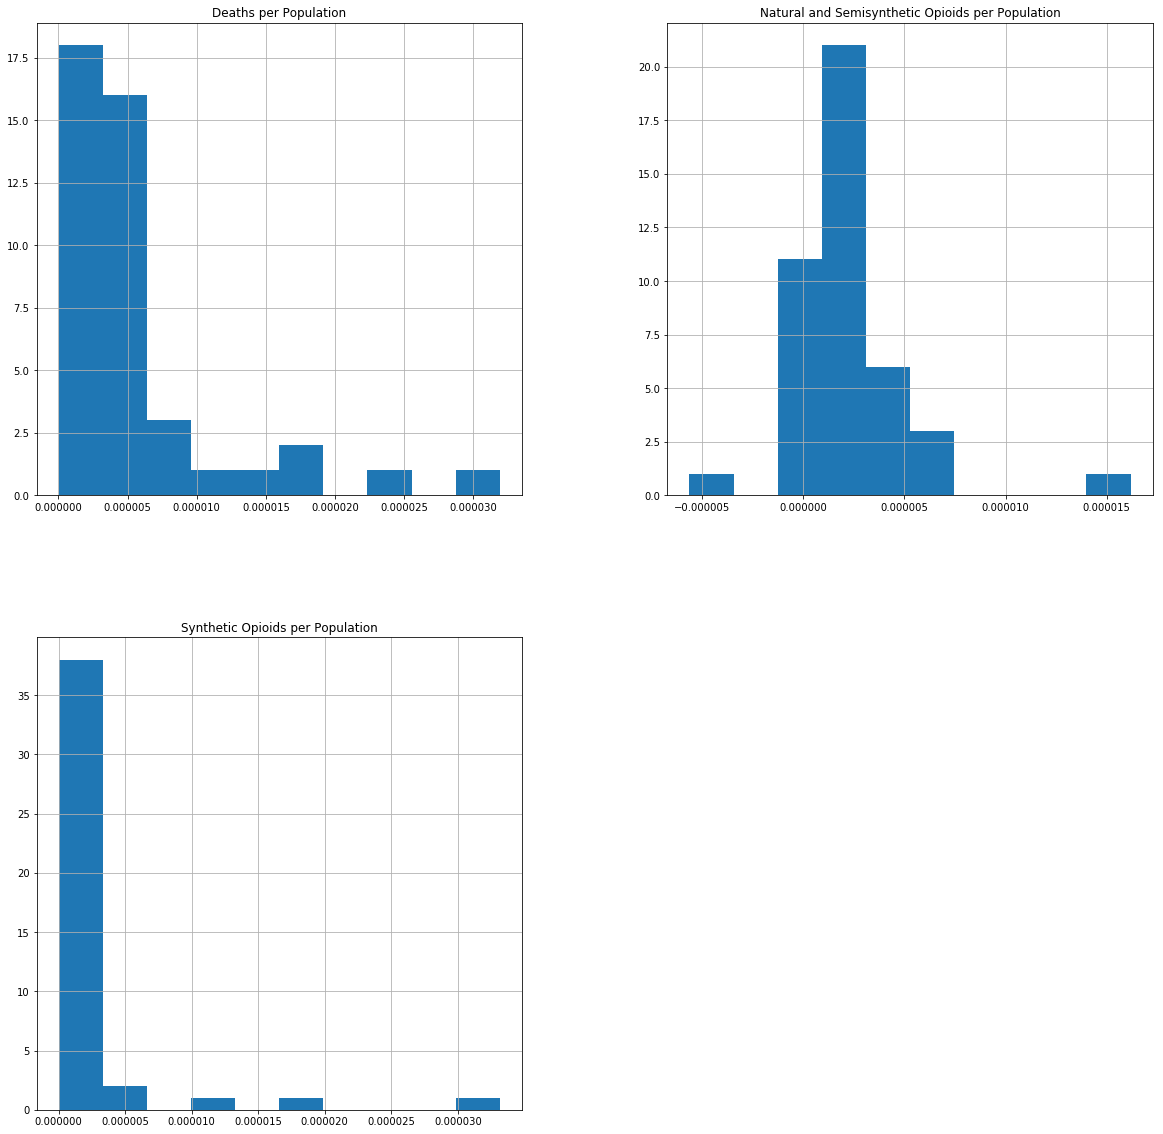

In [159]:
df_growth.hist(figsize=(20, 20))
plt.show()

In [160]:
df_growth[df_growth['State'] == 'Colorado']

,State,Deaths per Population,Natural and Semisynthetic Opioids per Population,Synthetic Opioids per Population
4,Colorado,0.000004,0.000002,6.987451e-07


In [161]:
df_growth[df_growth['Synthetic Opioids per Population'] > df_growth['Natural and Semisynthetic Opioids per Population']]

,State,Deaths per Population,Natural and Semisynthetic Opioids per Population,Synthetic Opioids per Population
0,Alabama,1.694005e-06,-6.707791e-07,5.422681e-07
6,Delaware,6.284313e-07,-5.619924e-06,4.024239e-06
14,Kentucky,1.342906e-05,3.104546e-06,3.540683e-06
16,Maine,2.515914e-05,7.126904e-06,1.766419e-05
18,Massachusetts,4.858412e-06,1.503894e-06,2.104957e-06
20,Minnesota,2.205364e-06,-1.270581e-07,6.751951e-08
24,New Hampshire,1.892545e-05,3.396092e-06,1.153095e-05
33,Rhode Island,3.190730e-05,-1.106266e-06,3.314349e-05
